# **Neural Networks | Project**

---



**Data Description:** Given a Bank customer, can we build a classifier that can determine whether they will leave or not using Neural networks?


The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Know your data: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling.

 

**Context:**
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a
customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

In [1]:
%tensorflow_version 2.x 

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf    # importing tensorflow libraries
tf.random.set_seed(42)  # Setting RandomSeed
tf.__version__

'2.1.0'

In [0]:
from sklearn import datasets
import numpy as np
import pandas as pd
import io
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns;

import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (14).csv


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))
df_original = pd.read_csv(io.BytesIO(uploaded['bank.csv']))
df.shape

(10000, 14)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


We can drop RowNumber and CustomerID as they are unique to all customers.
Also, we can drop Surname.

In [0]:
df.drop(labels=["RowNumber","CustomerId", "Surname"], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

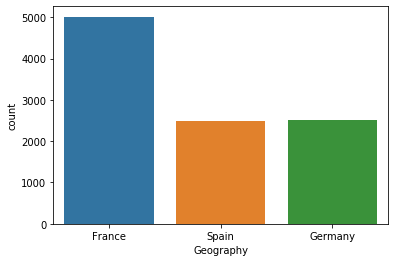

In [12]:
sns.countplot(x="Geography", data=df)

Three unique Geography location observed in the data set.

In [13]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

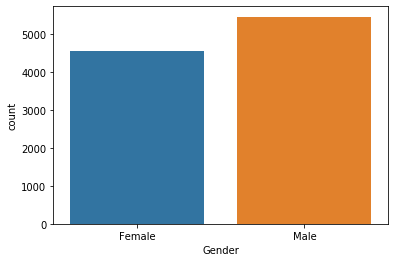

In [14]:
sns.countplot(x="Gender", data=df)

The Frequency of the two genders in the dataset is as shown above.

In [15]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [16]:
print("{} unique items found in Tenure.".format(len(df["Tenure"].value_counts())))

11 unique items found in Tenure.


Tenure ranges from 0-10

In [17]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

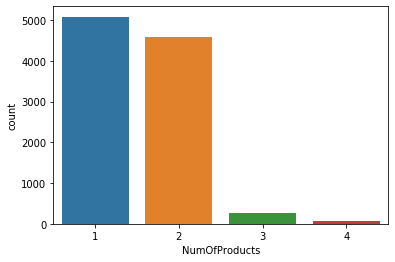

In [18]:
sns.countplot(x="NumOfProducts", data=df)

Unique entries for Number of products is found to be 1,2,3 and 4.

In [19]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

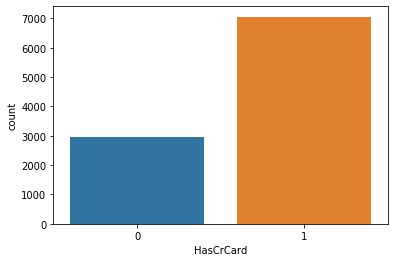

In [20]:
sns.countplot(x="HasCrCard", data=df)

7055 customers have Credit card and 2945 doesn't have credit card.

In [21]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

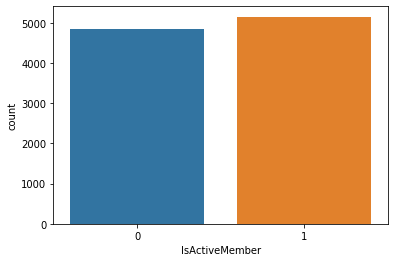

In [22]:
sns.countplot(x="IsActiveMember", data=df)

5151 Active members in 10000.

In [23]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

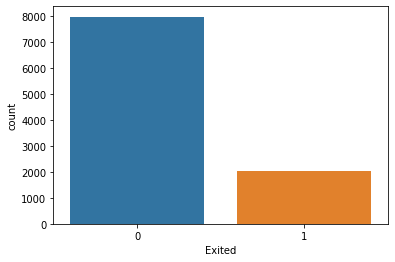

In [24]:
sns.countplot(x="Exited", data=df)

2037 customers have exited of 10000.

**Encoding Categorical features**

In [0]:
df = pd.get_dummies(df, prefix_sep='_')

In [26]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [27]:
df.shape

(10000, 14)

In [28]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**Distinguishing the feature(X) and target(Y) set.** 

In [0]:
X = df.drop(labels=["Exited"], axis=1)

In [39]:
X.shape

(10000, 13)

In [0]:
Y = pd.DataFrame(df["Exited"])

In [41]:
Y.shape

(10000, 1)

**Dividing the data set into training and test sets.
Setting 30% for the Test set.** 

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [44]:
x_train.shape

(8000, 13)

In [45]:
x_test.shape

(2000, 13)

In [46]:
y_train.shape

(8000, 1)

In [47]:
y_test.shape

(2000, 1)

In [48]:
y_train["Exited"].value_counts()

0    6378
1    1622
Name: Exited, dtype: int64

In [49]:
y_test["Exited"].value_counts()

0    1585
1     415
Name: Exited, dtype: int64

**Applying SMOTE to balance the DataSet**

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
# smt = SMOTE()
# x_train, y_train = smt.fit_sample(x_train, y_train)

In [0]:
# SmokeTrain = pd.DataFrame(y_train, columns=["Exited"])

In [0]:
# SmokeTrain["Exited"].value_counts()

In [0]:
# sns.countplot(x="Exited", data=SmokeTrain)

**One Hot Encoding**

In [0]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [0]:
y_train = pd.DataFrame(y_train, columns=["Exited"])
y_test = pd.DataFrame(y_test, columns=["Exited"])

In [0]:
y_train = pd.DataFrame(onehotencoder.fit_transform(y_train).toarray())
y_test = pd.DataFrame(onehotencoder.fit_transform(y_test).toarray())

In [58]:
y_train.shape

(8000, 2)

In [59]:
y_test.shape

(2000, 2)

**Normalizing the train and test data**

In [0]:
from sklearn import preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [62]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

**Defining a Sequential Model**

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

In [66]:
x_train.shape

(8000, 13)

In [0]:
epochs=40
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.3

sgd = tf.keras.optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [0]:
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.5)

In [0]:
# model.add(Dense(15, activation='relu', use_bias=True, input_shape=(13,)))
# model.add(Dense(123, activation='sigmoid'))
# model.add(Dense(2, activation='sigmoid'))
# model.add(Dense(3, activation='sigmoid'))

model.add(Dense(13, activation=leaky_relu, input_shape=(13,)))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(13, activation=leaky_relu))
model.add(Dense(2,activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                1

In [72]:
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 127us/sample - loss: 0.4549 - accuracy: 0.7993 - val_loss: 0.4240 - val_accuracy: 0.8090
Epoch 2/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.4237 - accuracy: 0.8144 - val_loss: 0.4154 - val_accuracy: 0.8170
Epoch 3/10
8000/8000 [==============================] - 0s 62us/sample - loss: 0.4103 - accuracy: 0.8269 - val_loss: 0.4005 - val_accuracy: 0.8360
Epoch 4/10
8000/8000 [==============================] - 1s 63us/sample - loss: 0.3837 - accuracy: 0.8430 - val_loss: 0.3607 - val_accuracy: 0.8495
Epoch 5/10
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3627 - accuracy: 0.8525 - val_loss: 0.3474 - val_accuracy: 0.8590
Epoch 6/10
8000/8000 [==============================] - 0s 62us/sample - loss: 0.3568 - accuracy: 0.8543 - val_loss: 0.3419 - val_accuracy: 0.8580
Epoch 7/10
8000/8000 [==============================] - 1s 66us/sampl

In [73]:
score=model.evaluate(x_test,y_test)

2000/2000 [==============================] - 0s 40us/sample - loss: 0.3371 - accuracy: 0.8605


In [74]:
score

[0.3370640196800232, 0.8605]

In [0]:
y_predict = model.predict(x_test)

In [76]:
y_predict[0]

array([0.97724336, 0.0227567 ], dtype=float32)

In [0]:
y_predict[:,1] = (y_predict[:,1] >= 0.5).astype(int)
y_predict[:,0] = (y_predict[:,0] >= 0.5).astype(int)

In [0]:
dff=pd.DataFrame(y_predict,columns=['Non-Exited','Exited'])

In [0]:
y_actual=y_test[:][1]
y_predict=dff['Exited']

In [0]:
from sklearn import metrics

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [82]:
results = confusion_matrix(y_actual, y_predict) 
print('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[1545   40]
 [ 239  176]]


In [83]:
print('Accuracy Score :',accuracy_score(y_actual, y_predict) )
print('Report : ')
print(classification_report(y_actual, y_predict) )

Accuracy Score : 0.8605
Report : 
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1585
         1.0       0.81      0.42      0.56       415

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.86      0.86      0.84      2000



In [0]:
ypa = pd.DataFrame(y_predict)

In [85]:
ypa["Exited"].value_counts()

0.0    1784
1.0     216
Name: Exited, dtype: int64

In [0]:
yaa = pd.DataFrame(y_actual)

In [87]:
yaa[1].value_counts()

0.0    1585
1.0     415
Name: 1, dtype: int64